<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTree and RandomForest

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
X = X[:,:2]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [38]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[0] <= 5.45\ngini = 0.666\nsamples = 112\nvalue = [38, 38, 36]'),
 Text(83.7, 108.72, 'X[1] <= 2.8\ngini = 0.153\nsamples = 36\nvalue = [33, 3, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [32, 1, 0]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 6.15\ngini = 0.559\nsamples = 76\nvalue = [5, 35, 36]'),
 Text(209.25, 36.23999999999998, 'gini = 0.498\nsamples = 36\nvalue = [5, 24, 7]'),
 Text(292.95, 36.23999999999998, 'gini = 0.399\nsamples = 40\nvalue = [0, 11, 29]')]

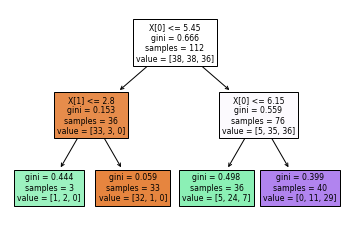

In [39]:
from sklearn import tree
tree.plot_tree(clf, filled=True)

In [40]:
# !pip install graphviz
# conda install python-graphviz (in cmd 창)

In [41]:
from sklearn.tree import export_graphviz
import graphviz

In [42]:
export_graphviz(
    clf,
    out_file="./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
)


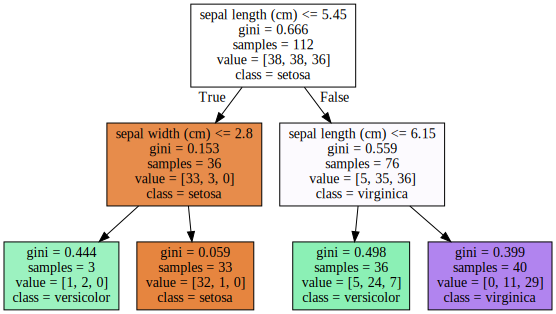

In [43]:
with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

In [44]:
clf.predict([[6., 7.]]), clf.predict_proba([[6., 7.]])

(array([1]), array([[0.13888889, 0.66666667, 0.19444444]]))

In [45]:
clf.score(X_test, y_test)

0.7631578947368421

### breast cancer data

In [46]:
from sklearn.datasets import load_breast_cancer

In [48]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [56]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9370629370629371

In [57]:
list(zip(cancer.feature_names, clf.feature_importances_.round(3)))

[('mean radius', 0.007),
 ('mean texture', 0.043),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.003),
 ('smoothness error', 0.0),
 ('compactness error', 0.019),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.009),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.712),
 ('worst texture', 0.059),
 ('worst perimeter', 0.0),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.021),
 ('worst concavity', 0.011),
 ('worst concave points', 0.116),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [ ]:
import pandas as pd
df = pd.DataFrame({"feature": cancer.feature_names, 
                  "importance": clf.feature_importances_})
df

In [62]:
df = df.sort_values(by='importance', ascending=False)
df.head(5)

,feature,importance
20,worst radius,0.711625
27,worst concave points,0.115708
21,worst texture,0.059071
1,mean texture,0.043044
25,worst compactness,0.021073


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

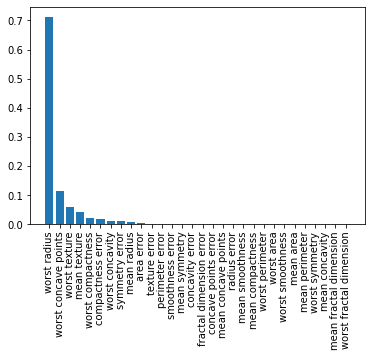

In [65]:
x = df.feature
y = df.importance
plt.bar(x, y)
plt.xticks(rotation=90)